<a href="https://colab.research.google.com/github/IgnacioOQ/Phil_DS/blob/main/2_Intro_to_Prob_and_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Plan

1. Intro to Probability
2. Random Variables and Probability Distributions
3. Expectations of Random Variables
4. Binomial and Normal Distributions
5. Correlation between Random Variables
6. Let us take a look at some data
7. Some words on the CLT

# Intro to Probability

## Intuition, Examples, Frequentism vs Bayesianism



#### Definitions of Probability:

- **Classical Definition**: Probability measures the long-run relative frequency of an event occurring, based on repeated random trials under identical conditions.
  
  **Formula**:
  $ P(A) = \frac{\text{number of favorable outcomes}}{\text{total number of possible outcomes}} $

- **Subjective Probability**: This definition of probability is based on individual judgment or belief about the likelihood of an event occurring, rather than long-run frequency or classical approaches. It varies between individuals depending on their knowledge and experience.


In [ ]:
import numpy as np
from IPython.display import clear_output

In [ ]:
flips = np.random.choice([0,1], size=10, replace=True, p=[0.5,0.5])
print(flips)
#clear_output()

[1 0 0 0 1 0 0 0 0 0]


In [ ]:
for n in [1,10,100,1000,10000]:
  flips = np.random.choice([0,1], size=n, replace=True, p=[0.2,0.8])
  print(np.mean(flips))
#clear_output()

1.0
0.8
0.79
0.796
0.7965


## Sample and Event Spaces

### Definitions:

**Sample Space (S)**
- **Definition**: The sample space or universal set is the set of all possible outcomes of a random experiment.
- **Example**: For a coin toss, the sample space is $S = \{H, T\}$ where "H" represents heads and "T" represents tails.

**Event Space**
- **Definition**: An event space is a collection $\mathcal{F}$ of subsets of $S$ closed under complement, countable unions, and countable intersections. Each subset corresponds to an event, which may occur as a result of the experiment.
- **Example**: For a single coin toss, possible events include getting heads ($\{H\}$), getting tails ($\{T\}$), and getting either heads or tails ($\{H, T\}$).

### Key Points:

- The **sample space** includes all outcomes that are mutually exclusive (no two outcomes can occur at the same time) and collectively exhaustive (one of the outcomes must occur).
- An **event** is a subset of the sample space and represents any combination of outcomes, including the possibility of an empty set ($\emptyset$), which represents an impossible event.
- **Event spaces** are typically represented by the power set of the sample space, which includes all possible events.
- Practical computation of probabilities involves mapping each event in the event space to a probability value, ensuring that the total probability across all events in the sample space sums to 1.

### Mathematical Representation:

- If $S$ is a sample space, then the event space $\mathcal{F}$ is a sigma-algebra over $S$, which includes at least the empty set, the sample space itself, and is closed under complementation and countable unions.
- **Formula**: If $A$ is an event, then the probability of $A$ occurring is denoted by $P(A)$, where $P: \mathcal{F} \to [0, 1]$.

### Example:

Consider a dice roll:

- **Sample Space (S)**: $S = \{1, 2, 3, 4, 5, 6\}$
- **Event**: Getting an odd number $A = \{1, 3, 5\}$
- **Event Space ($\mathcal{F}$)**: Power set of $S$, including subsets like $\{1, 3, 5\}$, $\{2, 4, 6\}$, $\emptyset$ (impossible event), etc.
- **Probability**: $P(A) = \frac{3}{6} = 0.5$

This chapter establishes the foundational concepts used in probability theory, particularly defining the environments in which probabilities are calculated.



In [ ]:
rolls = np.random.choice([1,2,3,4,5,6], size=10, replace=True, p=[1/6,1/6,1/6,1/6,1/6,1/6])
rolls

array([2, 6, 4, 1, 3, 4, 6, 2, 3, 5])

# Probability Axioms



### Definitions and Concepts

- **Probability** quantifies the likelihood of an event occurring, expressed on a scale from 0 (impossible) to 1 (certain).
- **Experiment** refers to a process or action that results in one of several possible outcomes.
- **Outcome** is a possible result of an experiment.
- **Event** is a set of outcomes (a subset of the sample space).
- **Sample Space (S)**: The set of all possible outcomes of an experiment.

### Probability Axioms

1. **Non-negativity**: For any event $ A $, the probability $ P(A) \geq 0 $.
2. **Normalization**: The probability of the sample space is 1, $ P(S) = 1 $.
3. **Additivity**: For any two mutually exclusive events $ A $ and $ B $ (i.e., $ A \cap B = \emptyset $), the probability of their union is $ P(A \cup B) = P(A) + P(B) $.

- **Conditional Probability**: The probability of an event $ A $ given that event $ B $ has occurred is defined as:
  $ P(A|B) = \frac{P(A \cap B)}{P(B)} $
  provided $ P(B) > 0 $.

### Key Rules of Probability

- **Complement Rule**: The probability of the complement of event $ A $ (not $ A $) is $ P(A^c) = 1 - P(A) $.
- **Addition Rule for General Cases**: For any two events $ A $ and $ B $, the probability of their union is $ P(A \cup B) = P(A) + P(B) - P(A \cap B) $.
- **Law of Total Probability** if $A_i$ are mutually exclusive and exhaustive:
  
  $ P(B) = \sum_{i} P(B|A_i)P(A_i) $
- **Multiplicative Law**: $P(A\cap B) = P(A|B)P(B) = P(B|A)P(A)$

### Independent Events

- **Independence**: Two events $ A $ and $ B $ are independent if:
  $ P(A \cap B) = P(A)P(B) $
  which implies:
  $ P(A|B) = P(A) \quad \text{and} \quad P(B|A) = P(B) $

### Bayes' Theorem

Bayes' Theorem provides a way to update the probability estimate for an event based on new information and is a fundamental theorem in probability theory:

$ P(A|B) = \frac{P(B|A)P(A)}{P(B)} $

Where:
- $ P(A|B) $ is the posterior probability of $ A $ given $ B $.
- $ P(B|A) $ is the likelihood of $ B $ given $ A $.
- $ P(A) $ is the prior probability of $ A $.
- $ P(B) $ is the marginal probability of $ B $, which can be calculated using the Law of Total Probability if $ B $ depends on multiple conditions:
  
  $ P(B) = \sum_{i} P(B|A_i)P(A_i) $

This section sets the groundwork for understanding more complex probability distributions and statistical inferences discussed in subsequent sections of the chapter.

## Disease Example and Notions

#### Definitions and Formulas:

- **Sensitivity** (True Positive Rate): The probability that the test correctly identifies a person with the disease.

  $ \text{Sensitivity} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}=P(+|D) $

- **Specificity** (True Negative Rate): The probability that the test correctly identifies a person without the disease.
  $ \text{Specificity} = \frac{\text{True Negatives}}{\text{True Negatives + False Positives}}=P(-|\overline{D}) $

- **Positive Predictive Value (PPV)**: The probability that a person has the disease given that the test result is positive.
  $ \text{PPV} = \frac{\text{True Positives}}{\text{True Positives + False Positives}} $

- **Negative Predictive Value (NPV)**: The probability that a person does not have the disease given that the test result is negative.
  $ \text{NPV} = \frac{\text{True Negatives}}{\text{True Negatives + False Negatives}} $



# Random Variables and Probability Distributions


### Section 2.2: Random Variables and Probability Distributions

This section covers the definitions and properties of random variables and their associated probability distributions, both discrete and continuous.

#### Definitions and Key Concepts:

- **Random Variable**: A function that assigns a numerical value to each outcome in a sample space.
- **Probability Distribution**: Describes how probabilities are distributed over the values of the random variable.

#### Discrete Random Variables:

- **Probability Mass Function (PMF)**: Gives the probability that a discrete random variable is exactly equal to some value.
  
  **Formula**:
  $P(X = x) = p(x)$
  where $p(x)$ is the PMF of $X $.



### Bernoulli Distribution (biased coin)

A random variable $ X$ follows a Bernoulli distribution if it can take the value 1 with probability $p$ (success) and the value 0 with probability $1-p$ (failure). Here, $p$ represents the probability of success.

### Mathematical Formulas:

- **Probability Mass Function (PMF):**

  $
  P(X = x) =
  \begin{cases}
  p & \text{if } x = 1, \\
  1-p & \text{if } x = 0.
  \end{cases}
  $
  
  This function provides the probabilities for the two possible outcomes of the Bernoulli trial.

- **Expected Value:** The expected value of a Bernoulli random variable $ X $ is $ p $. This is calculated as:
  $
  E[X] = 1 \cdot p + 0 \cdot (1-p) = p
  $
  The expected value tells you the average outcome of many trials, weighted by the probabilities of the outcomes.

- **Variance:** The variance of a Bernoulli random variable, which measures the spread of the outcomes, is given by:
  
  $
  \text{Var}(X) = p(1-p)
  $
  The variance captures the variability of the outcome from its expected value.

### Characteristics:

- **Binary Outcome:** Only two possible outcomes for each trial.
- **Independent Trials:** In scenarios where you have multiple Bernoulli trials, the trials are considered independent if the outcome of one trial does not affect the outcomes of other trials.

### Binomial Distribution (many shot Bernoulli)

A random variable $X$ follows a Binomial distribution, denoted by $X \sim \text{Bin}(n, p)$, if it represents the number of successes in $n$ independent Bernoulli trials, each with a success probability of $p$. The probability mass function (PMF) of a Binomial distribution is given by:

$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}
$$

where:
- $n$ is the number of trials,
- $k$ is the number of successes, which can take values $0, 1, 2, \ldots, n$,
- $\binom{n}{k}$ is the binomial coefficient, calculated as $\frac{n!}{k!(n-k)!}$.

This distribution describes the number of successes in a fixed number of trials in an experiment that has only two possible outcomes, typically termed "success" and "failure".


In [ ]:
for n in [1,10,100,1000,10000]:
  flips = np.random.choice([0,1], size=n, replace=True, p=[0.2,0.8])
  print(np.mean(flips))
#clear_output()

0.0
0.8
0.78
0.8
0.7925


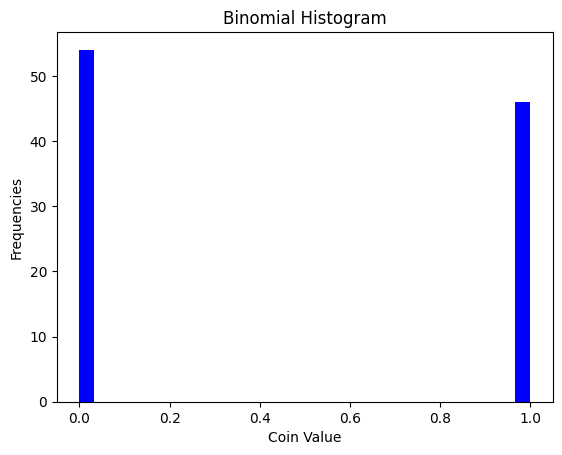

In [ ]:
import matplotlib.pyplot as plt

# Flip 1 coin with 50% chance of heads 1000 times
# if you flip more than one coin it gives you the number of successes for that flip
s = np.random.binomial(1, 0.5, 100)
plt.title("Binomial Histogram")
plt.xlabel("Coin Value")
plt.ylabel("Frequencies")
plt.hist(s,30,color='blue')
plt.show()

#### Continuous Random Variables:

- **Probability Density Function (PDF)**: Describes the density of probability at each point for continuous random variables. Their probability distributions assign probabilities to intervals of real numbers rather than individual values. The area under the function over an interval of values, which equals its integral over that interval, is the probability that the random variable falls in that interval.

- **Cumulative Distribution Function (CDF)**: Gives the probability that a random variable is less than or equal to a certain value.
  
  **Formula**:
  $ F(x) = P(X \leq x) = \int_{-\infty}^{x} f(t) \, dt $
  where $F(x) $ is the CDF of $ X $.

#### Uniform Distribution Formula

The Uniform distribution, often denoted as $\text{U}(a, b)$, describes an experiment where all outcomes are equally likely between two bounds, $a$ and $b$. The probability density function (PDF) for the Uniform distribution is given by:

$$
f(x) = \frac{1}{b-a} \quad \text{for} \, a \leq x \leq b
$$

where:
- $a$ is the lower bound,
- $b$ is the upper bound,
- $f(x)$ is constant between $a$ and $b$.

The Uniform distribution is used to model scenarios where each outcome within a specific range is equally likely to occur.


### Integrals for the Uniform Distribution

For a random variable \(X\) following a Uniform distribution over the interval \([a, b]\), the density function is given by:

$$
f(x) = \frac{1}{b-a} \quad \text{for } a \leq x \leq b
$$

For probabilities involving intervals, such as $P(c \leq X \leq d)$ where $a \leq c \leq d \leq b$, the probability is calculated by the integral:

$$
P(c \leq X \leq d) = \int_c^d \frac{1}{b-a} \, dt = \frac{d-c}{b-a}
$$

The cumulative distribution function (CDF), which gives the probability that \(X\) is less than or equal to a value \(x\), is calculated as:

$$
F(x) = \int_a^x \frac{1}{b-a} \, dt
$$

This integral evaluates to:

$$
F(x) = \frac{x-a}{b-a} \quad \text{for } a \leq x \leq b
$$


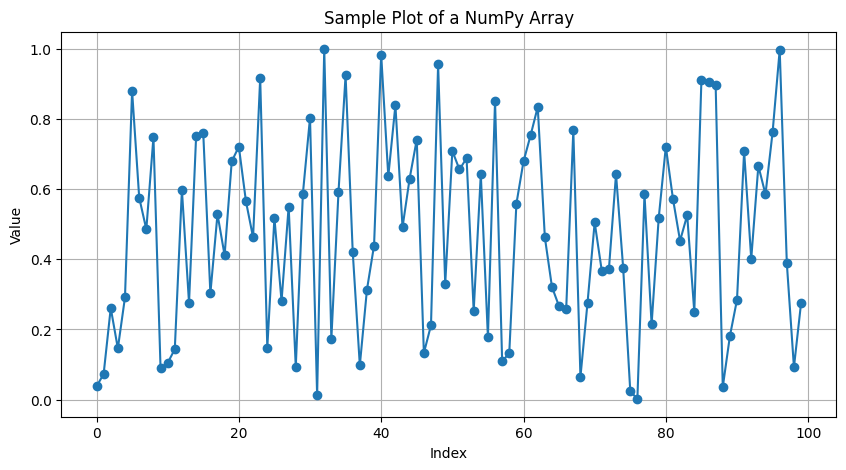

In [ ]:
# Create a sample NumPy array
data = np.random.uniform(low=0, high=1, size=100)

# Plotting the data
plt.figure(figsize=(10, 5))  # Create a figure with a custom size
plt.plot(data, 'o-')  # 'o-' style creates a line plot with circle markers
plt.title('Sample Plot of a NumPy Array')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)  # Enable grid for easier readability
plt.show()

## The Normal Distribution

The Normal distribution, also known as the Gaussian distribution, is one of the most important probability distributions in statistics, due to its natural occurrence in many biological, social, and physical phenomena. The distribution is symmetric and bell-shaped, defined by two parameters: mean ($\mu$) and standard deviation ($\sigma$).

#### Definitions and Formulas:

- **Normal Distribution**: A continuous random variable $X$ is said to follow a Normal distribution if its probability density function (PDF) is given by:
  $$
  f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
  $$
  where:
  - $\mu$ is the mean or expectation of the distribution (location of the peak).
  - $\sigma$ is the standard deviation (spread or width of the bell).

#### Properties:

- The total area under the curve of the probability density function is 1.
- About 68% of the data falls within one standard deviation ($\mu \pm \sigma$), 95% within two standard deviations ($\mu \pm 2\sigma$), and 99.7% within three standard deviations ($\mu \pm 3\sigma$).
- The Normal distribution is completely characterized by its mean and variance.

#### Standard Normal Distribution:

- A special case of the Normal distribution is the Standard Normal Distribution, where $\mu = 0$ and $\sigma = 1$. The variable $Z$ is then defined as:
  $$
  Z = \frac{X - \mu}{\sigma}
  $$
- The PDF for $Z$ simplifies to:
  $$
  f(z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}}
  $$



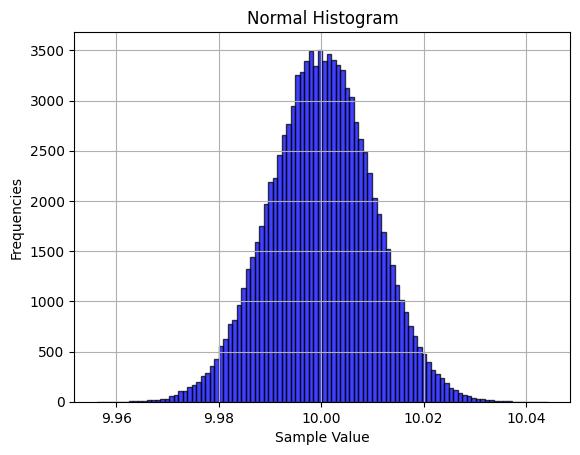

In [ ]:
mu, sigma = 10, 0.01 # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)

plt.title("Normal Histogram")
plt.xlabel("Sample Value")
plt.ylabel("Frequencies")
plt.hist(s,100, alpha=0.75, color='blue', edgecolor='black')
plt.grid(True)
plt.show()

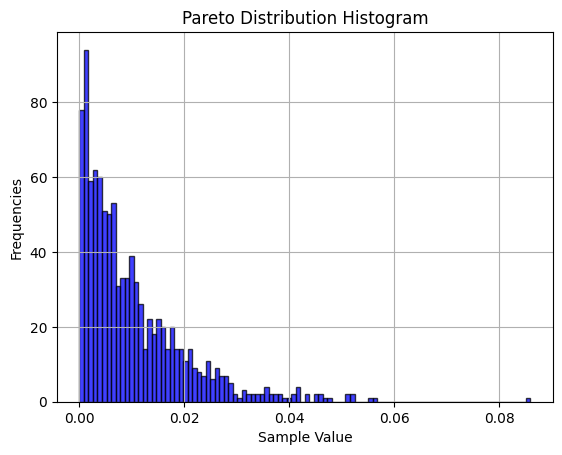

In [ ]:
# Similar to what we got when we studied rooms
s = np.random.pareto(100, 1000)
plt.title("Pareto Distribution Histogram")
plt.xlabel("Sample Value")
plt.ylabel("Frequencies")
plt.hist(s,100,alpha=0.75, color='blue', edgecolor='black')
plt.grid(True)
plt.show()

# Expectations of Random Variables


#### Definitions and Formulas:

- **Expected Value**: The expected value (or mean) of a random variable is a measure of the central tendency of a probability distribution.

  For a discrete random variable $X$ with probability mass function $p(x)$:
  $$
  E[X] = \sum_{x} x \cdot p(x) = \mu
  $$

  For a continuous random variable $X$ with probability density function $f(x)$:
  $$
  E[X] = \int_{-\infty}^{\infty} x \cdot f(x) \, dx = \mu
  $$

- **Variance**: Variance measures the spread of a random variable around its expected value.

  For any random variable $X$:
  $$
  \text{Var}(X) = E[(X - E[X])^2] = \sigma^2
  $$

  It can also be calculated as:
  $$
  \text{Var}(X) = E[X^2] - (E[X])^2= \sigma^2
  $$

- **Standard Deviation**: It is the square root of the variance, $\sigma$.
#### Key Concepts:

- **Linear Functions of Random Variables**: If $Y = a + bX$, then the expected value is:
  $$
  E[Y] = a + bE[X]
  $$
  and the variance is:
  $$
  \text{Var}(Y) = b^2 \text{Var}(X)
  $$

- **Standardizing a Random Variable**: Standardizing involves converting a random variable into a standard form. If $Z = \frac{X - \mu}{\sigma}$ where $\mu$ and $\sigma$ are the mean and standard deviation of $X$, respectively, then:
  $$
  E[Z] = 0 \quad \text{and} \quad \text{Var}(Z) = 1
  $$


# Covariance and Correlation
- **Covariance** is a measure of how much two random variables change together. It is calculated as:
  $$
  \text{Cov}(X, Y) = E[(X - \mu_X)(Y - \mu_Y)]
  $$
- **Correlation**, denoted as $\rho_{X,Y}$ or $\text{Corr}(X, Y)$, normalizes the covariance by the standard deviations of the variables, providing a dimensionless measure of linear dependence:
  $$
  \rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
  $$
- The correlation coefficient ranges from -1 to 1, where 1 indicates perfect positive correlation, -1 indicates perfect negative correlation, and 0 indicates no linear relationship.

## Caveats

### Simpson's Paradox

Correlations can be deceptive!!

Two variables can seem positively (negatively) correlated, but when we control for a different (confounding) variable the correlation *reverses*.

Check textbook example: People on the West Coast seem to have more numbers of friends on average than people on the East Coast. So it seems 'West Coast' is positively correlated with number of friends. But then we notice that if we look at people with PhDs, they have much fewer friends than people without them. And it is a contingent fact of our data set that there are many more people with PhDs in the East Coast. In fact, if we control for the variable 'having a PhD' people on the East Coast have more friends on average.

### Correlation and Causation

Similar as before. Correlation does not imply causation. We do not know what the underlying confounding variables are, and we need to control for that before making the leap from correlation to causation.


# Using Some Data

# Case Study: California Housing

Source: https://www.kaggle.com/datasets/camnugent/california-housing-prices

I do not know how reliable this source is, but it is a helpful data set for what we are doing this session.

**Homework: Do what we are going to do here with your own data set**

**IMPORTANT: DO NOT PICK ANY CSV. PICK A CSV IN WHICH EACH COLUMN ROUGHLY REPRESENTS A DISTINCT VARIABLE**

So for example, in the first notebook we used data about life expectancy. The csv in its original form had *years* as columns and *countries* as rows. That is weird because years are not roughly distinct variables. In that case, you would have to do a transpose operation so that countries correspond to columns (variables). The idea here is that you want to study the (statistical) relations between variables. Although there are methods to study the relations between years (time series), they are beyond the scope of this session. But studying how the life expectancy of a country is related with the life expectancy of another is a reasonable project.

In [ ]:
import pandas as pd

# First define the link as explained before
gdrive_share_link = 'https://drive.google.com/file/d/1oE4Uj650mAUEUz_fxe8wtThxI7RMe6go/view?usp=sharing'
file_id = '1oE4Uj650mAUEUz_fxe8wtThxI7RMe6go'
link = 'https://drive.google.com/uc?export=download&id=1oE4Uj650mAUEUz_fxe8wtThxI7RMe6go'

df = pd.read_csv(link)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
values = df['total_rooms']
values = values.to_numpy()
print('Values')
print(values)
print(len(values))

# Mean
print('Mean')
summation = 0
for i in values:
    summation += i
print(summation/len(values))
print(values.mean())
print(np.mean(values))

# Median
print('Median')
sorted_values = np.sort(values)
# length is even so we have to do a bit more of work
median_point = int(len(sorted_values)/2)
median = (sorted_values[median_point]+sorted_values[median_point+1])/2
print(median)
print(np.median(values))

# Quantile
print('Quantiles')
# I am definitely getting lazy here
print(np.quantile(values,0.5))
print(np.quantile(values,0.99))
print(np.quantile(values,0.01))

# Variance
print('Variance')
# I am too lazy to code it
print(np.var(values))

# Standard Deviation
print('Standard Deviation')
print(np.sqrt(np.var(values)))
print(np.std(values))

Values
[ 880. 7099. 1467. ... 2254. 1860. 2785.]
20640
Mean
2635.7630813953488
2635.7630813953488
2635.7630813953488
Median
2127.0
2127.0
Quantiles
2127.0
11212.11000000003
164.0
Variance
4759214.512668024
Standard Deviation
2181.5624017359723
2181.5624017359723


## Correlations?

### Covariance

Measures the joint variability of two random variables. How the 'covary'

$cov_{x,y}=\frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{n-1}$

In random variable notation:

$cov(X,Y)=E[(X-E[X])(Y-E[Y])]$

A large covariance means that X and Y tend to be large or small together. A negative covariance tell us that X and Y vary inversely, as X grows Y diminishes and vice-versa.

Problems:
- Covariance units are products of the units of the variables, which sometimes makes no sense (i.e. rooms per median income - ok that one kind of makes sense but sometimes it does not)
- It is hard to say how 'large' is a covariance. If Y=2X the covariance will be twice as much as if Y=X. But in a sense they are equally correlated.

### Correlation

So usually in statistics a better measure of how variables relate is used, which is called correlation.

Essentially you normalize the covariance by the standard deviations, so that to scale it better.

$\rho_{X,Y}=corr(X,Y)=\frac{cov(X,Y)}{\sigma_X\sigma_Y}=\frac{E[(X-E[X])(Y-E[Y])]}{\sigma_X\sigma_Y}$

Correlation goes from 1 to -1, where 1 is perfect correlation and -1 perfect anticorrelation.

### Example

Lets use the variables "total_rooms" and "population" from our data set, which we sort of hope will be correlated.

In [ ]:
rooms = df['total_rooms'].to_numpy()
population = df['population'].to_numpy()

# np.cov(a,b) = [[cov(a,a) cov(a,b)][cov(b,a) cov(b,b)]]
# https://stackoverflow.com/questions/15317822/calculating-covariance-with-python-and-numpy

X =np.stack((rooms, population), axis=0)
Y = np.array([rooms,population])

print(np.array_equal(X,Y))
print(np.cov(X))
print(np.var(values))

# np.corrcoef(a,b) = [[corrcoef(a,a) corrcoef(a,b)][corrcoef(b,a) corrcoef(b,b)]]
print(np.corrcoef(Y))
print("Population and number of rooms are pretty correlatred by a coefficient of ~0.86!!!")

True
[[4759445.10593866 2117612.5457764 ]
 [2117612.5457764  1282470.45723326]]
4759214.512668024
[[1.         0.85712597]
 [0.85712597 1.        ]]
Population and number of rooms are pretty correlatred by a coefficient of ~0.86!!!


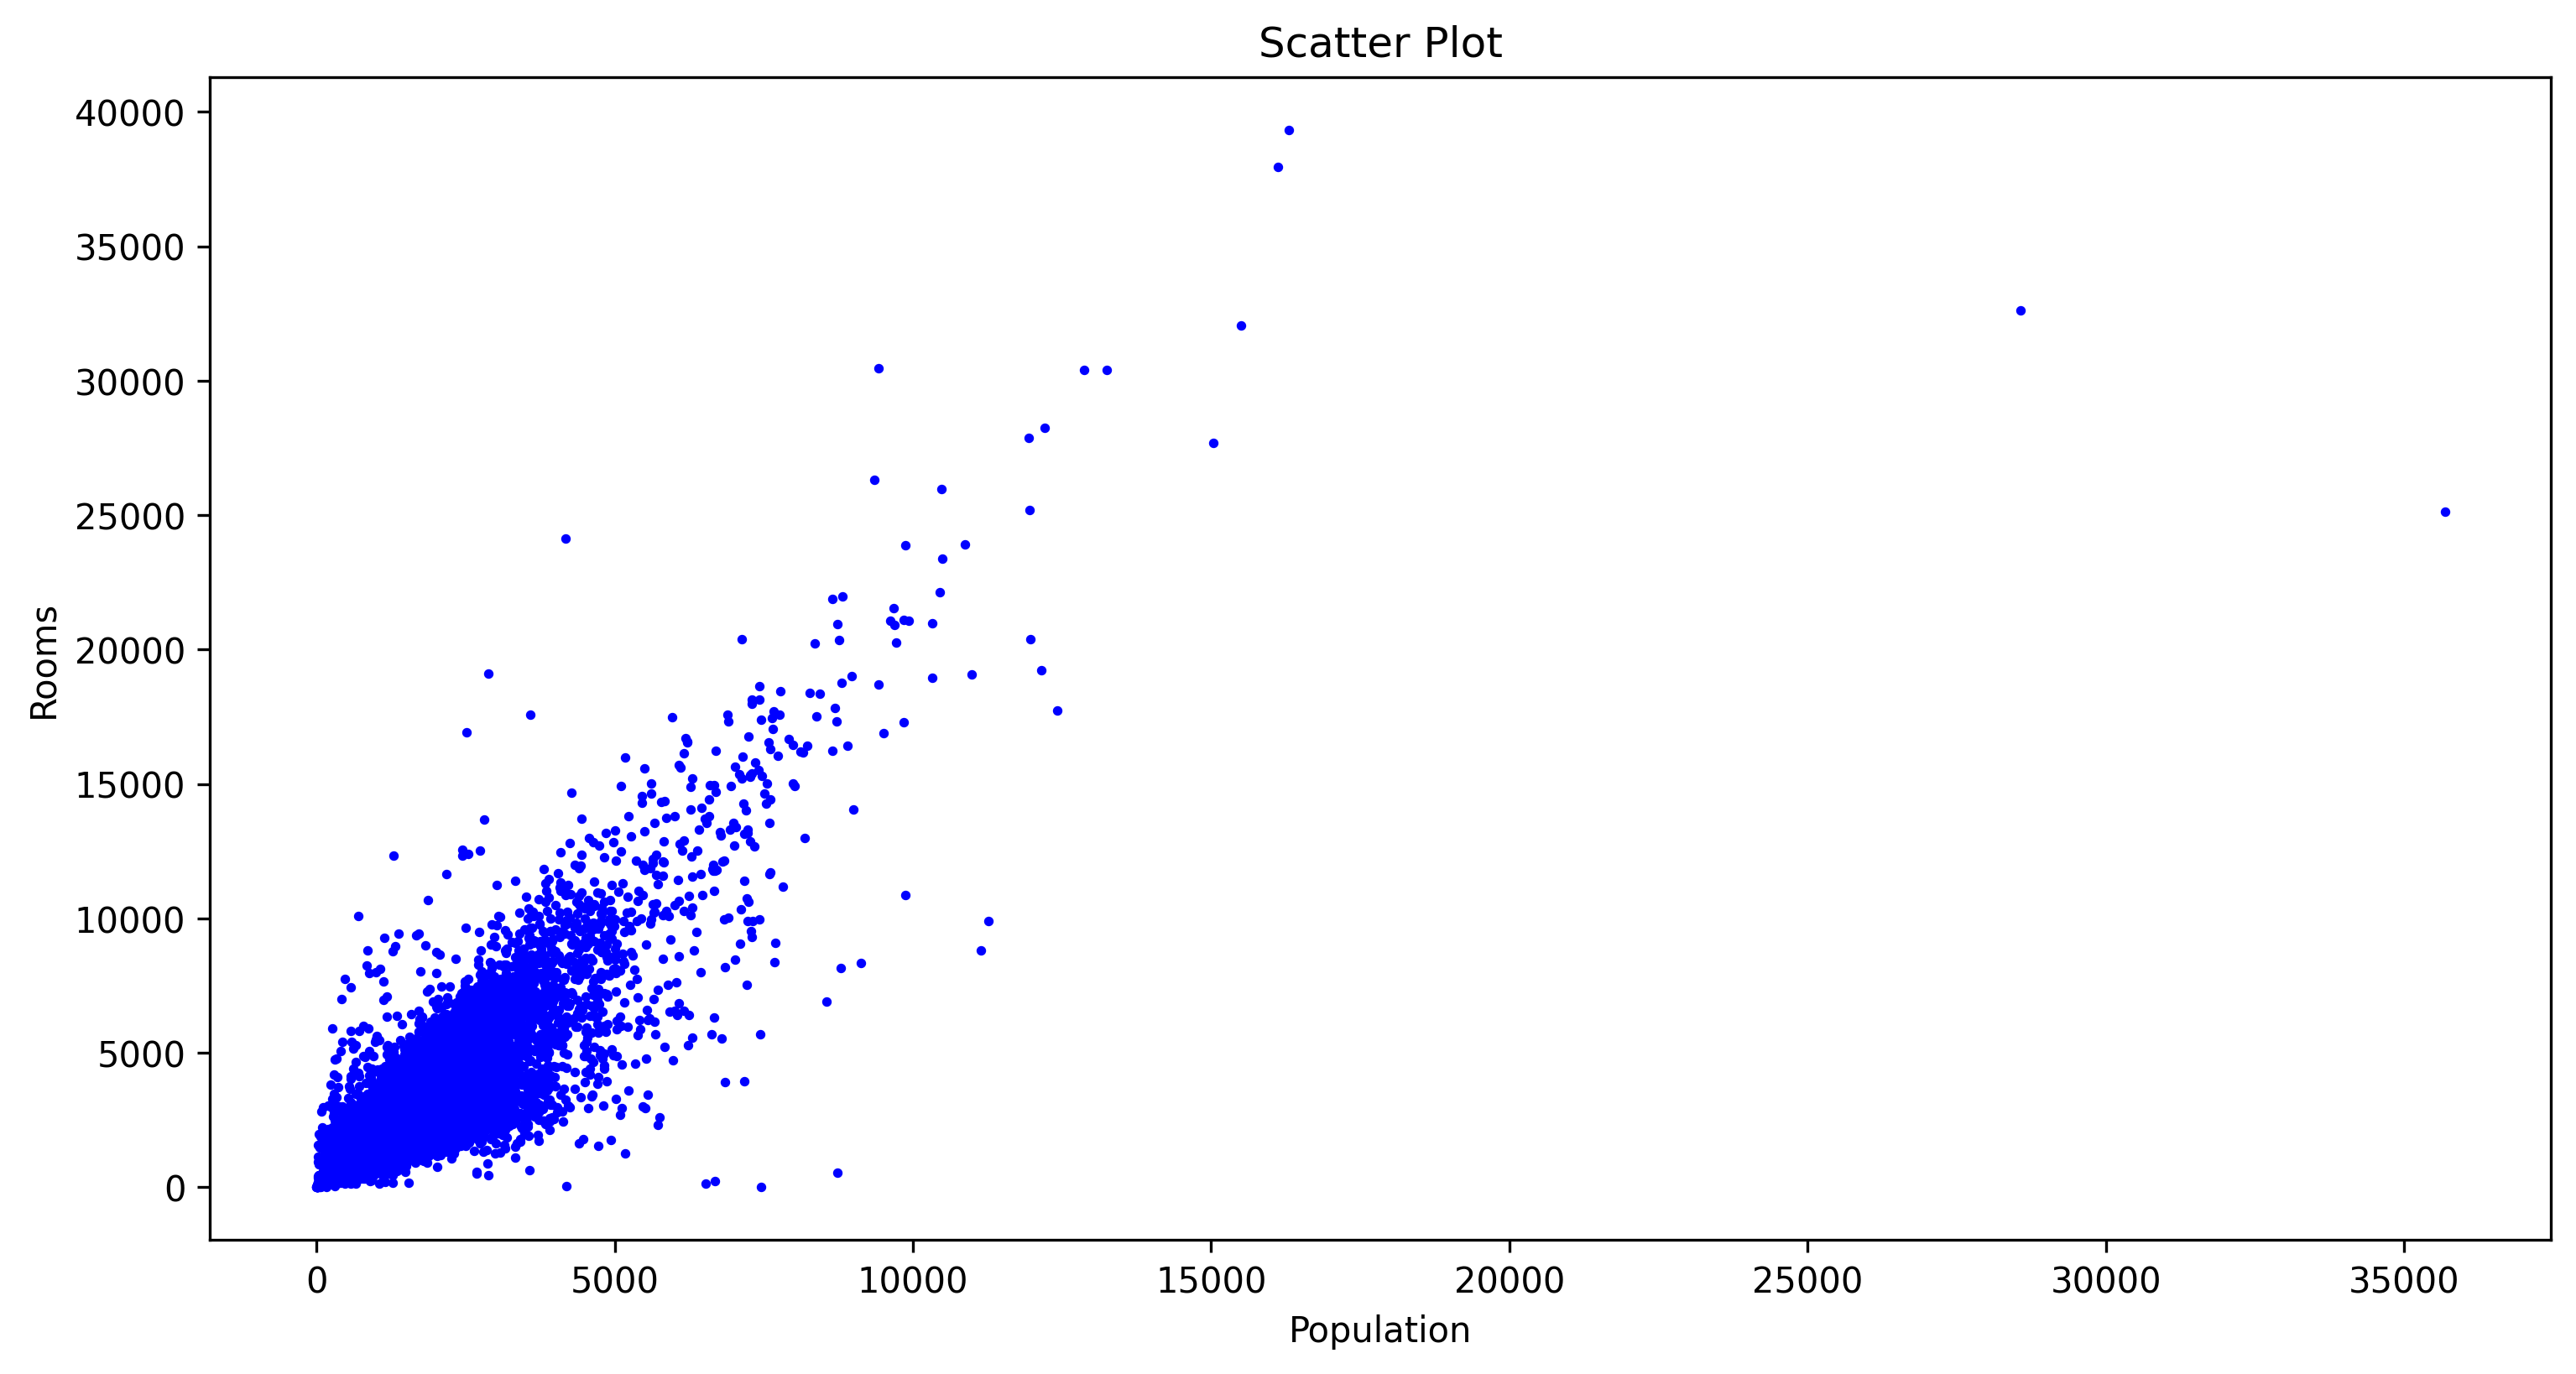

In [ ]:
from matplotlib.pyplot import figure
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

# plotting
figure(figsize=(12, 6), dpi=300)
plt.title("Scatter Plot")
plt.xlabel("Population")
plt.ylabel("Rooms")
plt.scatter(population, rooms, c ="blue",s=3)#c for color, s for size
plt.show()

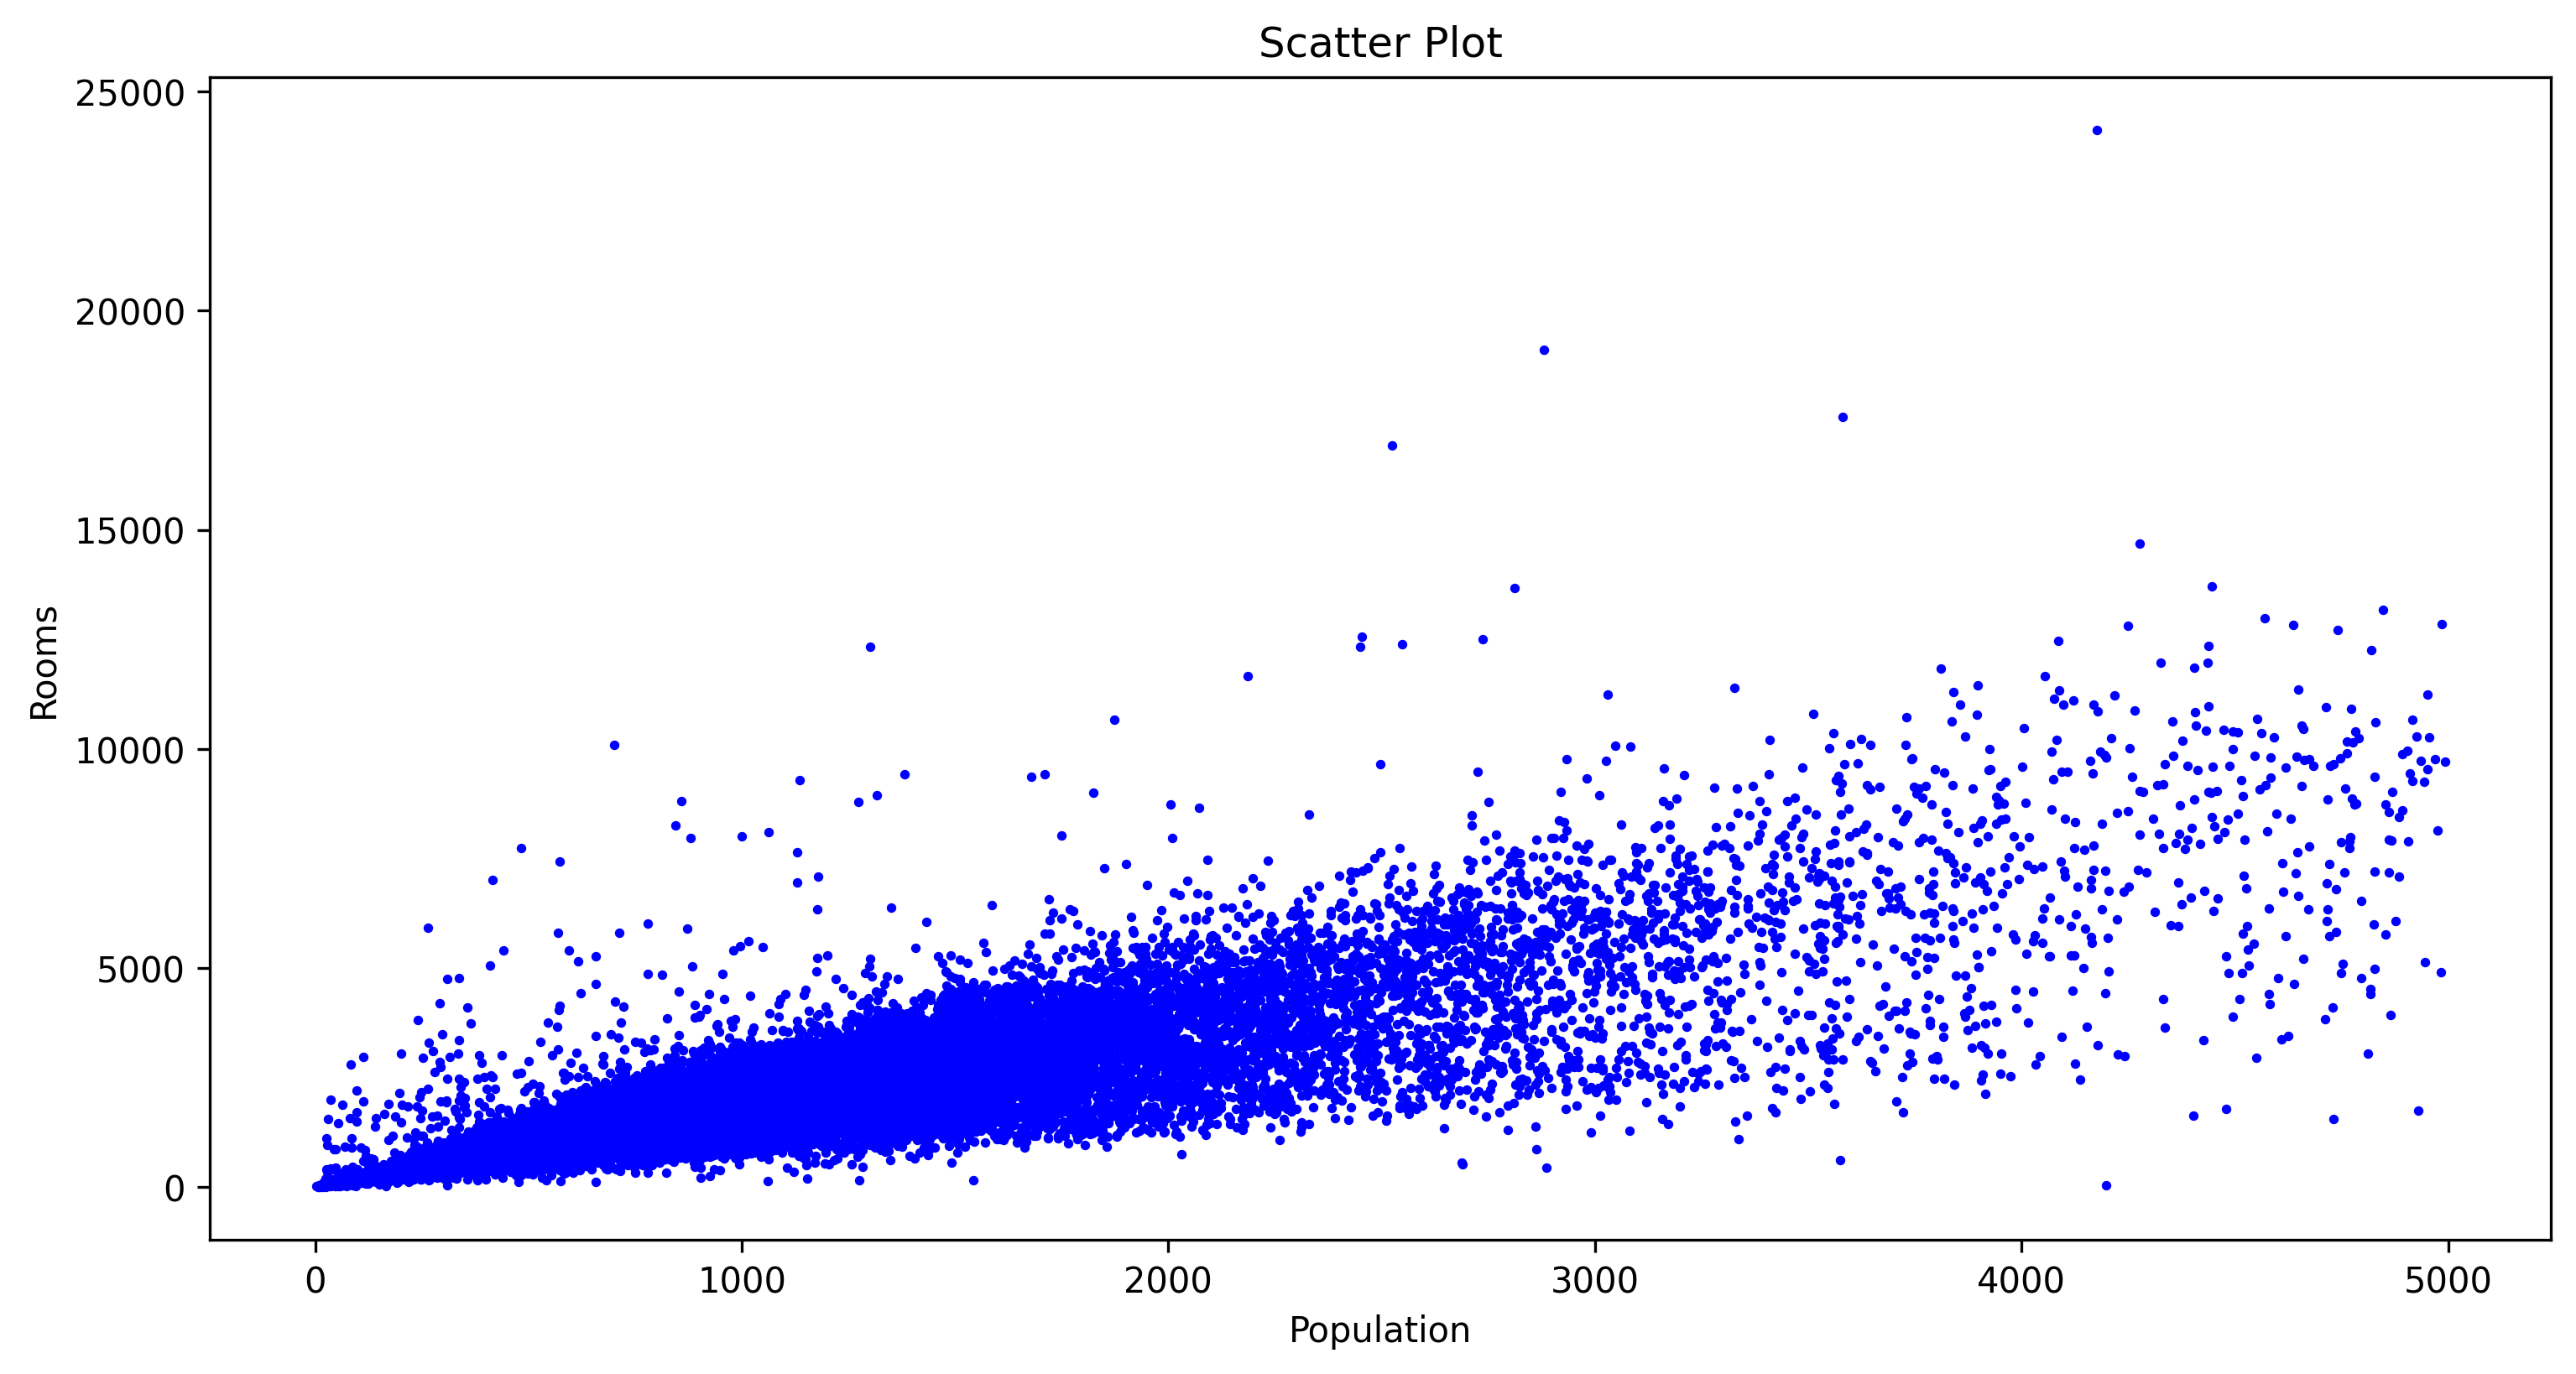

In [ ]:
# We want to focus on the regions with population less than 5000
# So we find the indexes of the entries with population more than 5000, and we delete them from both arrays
indexes = np.where(population>5000)
cut_pop = np.delete(population,indexes)
cut_rooms = np.delete(rooms,indexes)

# plotting
figure(figsize=(12, 6), dpi=300)
plt.title("Scatter Plot")
plt.xlabel("Population")
plt.ylabel("Rooms")
plt.scatter(cut_pop, cut_rooms, c ="blue",s=3)#c for color, s for size
plt.show()

## Probability Density Function (PDF)

A probability density function (PDF), or density of a continuous random variable X, is a function whose value at any given sample (or point) in the sample space (the set of possible values taken by the random variable) can be interpreted as providing a relative likelihood that the value of the random variable would be close to that sample. Probability density is the probability per unit length, in other words, while the absolute likelihood for a continuous random variable to take on any particular value is 0 (since there is an infinite set of possible values to begin with), the value of the PDF at two different samples can be used to infer, in any particular draw of the random variable, how much more likely it is that the random variable would be close to one sample compared to the other sample.

- $p[a\leq X\leq b] = \int_a^b f(X)dx$

## Cumulative Distribution Function

- $F_X(a)=\int_{-\infty}^a f(X)dx$

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


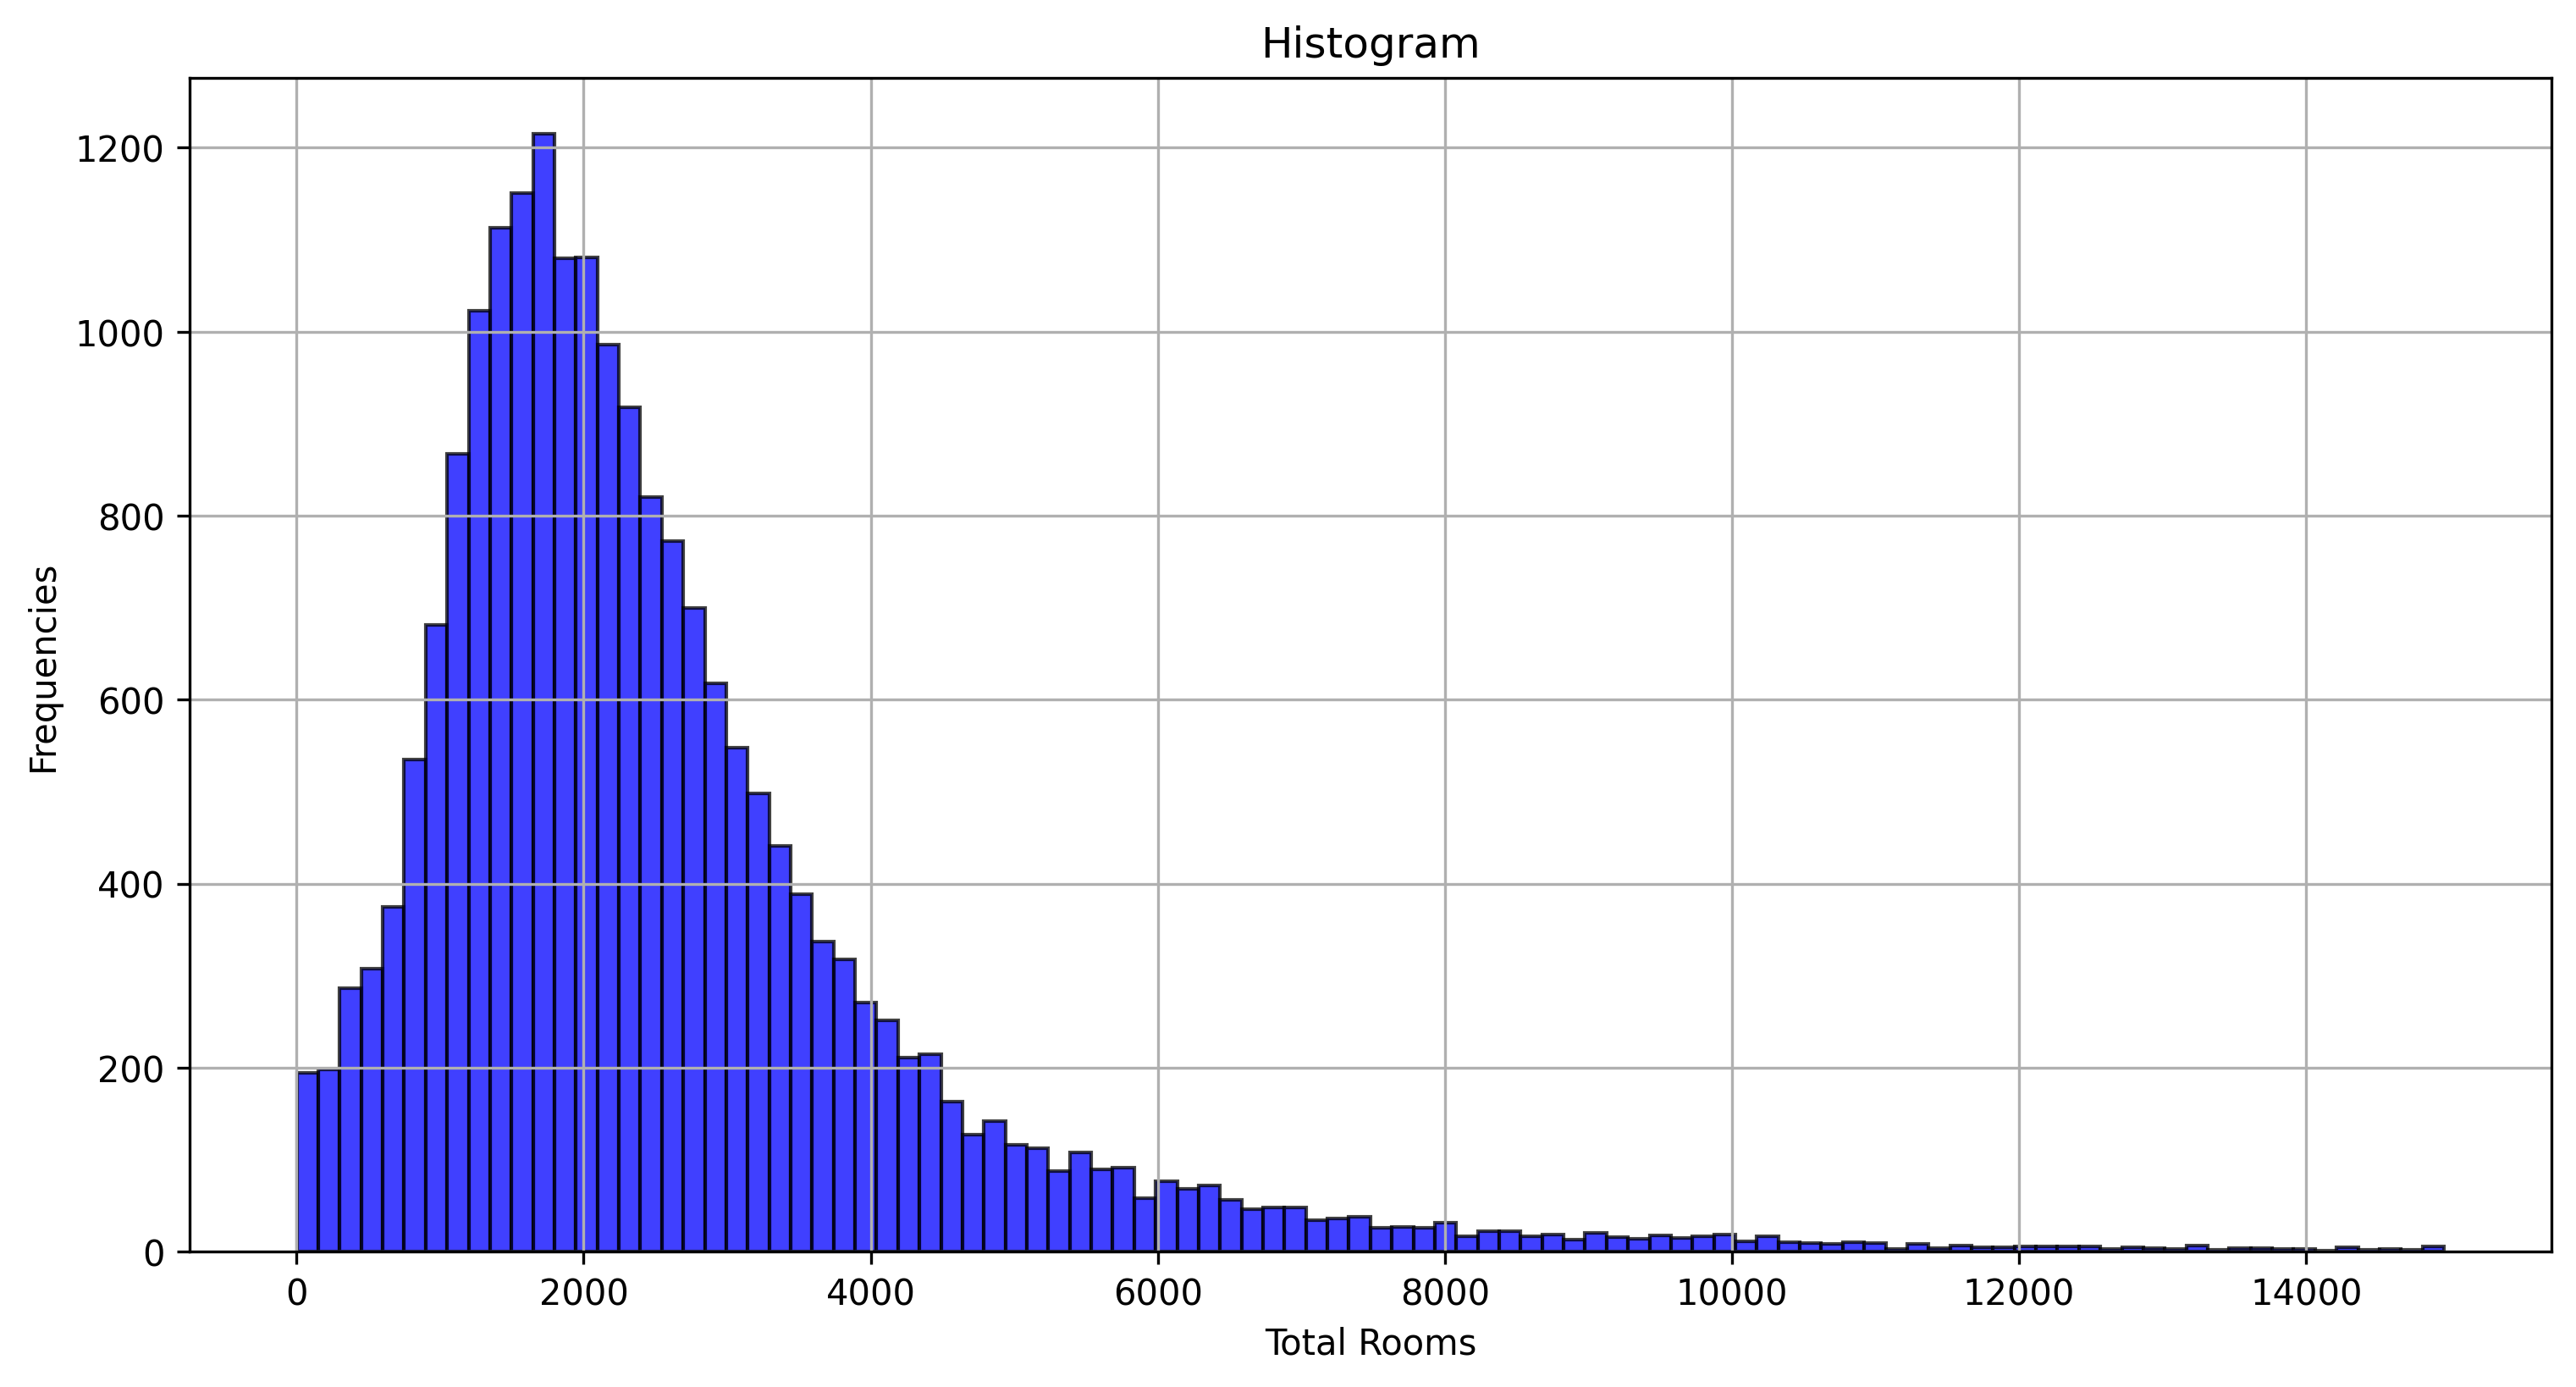

In [ ]:
# There is a bit of cleaning done here
proximity_values = df['ocean_proximity'].unique()
print(proximity_values)
replacement_array = np.array([1,2,3,4,5],dtype='float64')
cleaned_df = df.replace(proximity_values,replacement_array)

rooms = cleaned_df['total_rooms'].to_numpy()
indexes = np.where(rooms>15000)
cut_rooms = np.delete(rooms,indexes)

figure(figsize=(12, 6), dpi=300)
plt.title("Histogram")
plt.xlabel("Total Rooms")
plt.ylabel("Frequencies")
plt.hist(cut_rooms, bins=100,alpha=0.75, color='blue', edgecolor='black')
plt.grid(True)
plt.show()

1.0


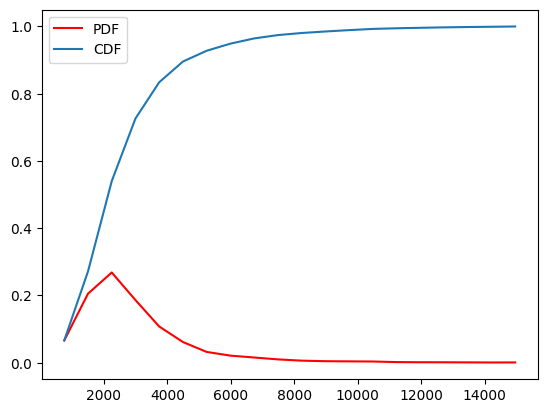

In [ ]:
# Source: https://www.geeksforgeeks.org/how-to-calculate-and-plot-a-cumulative-distribution-function-with-matplotlib-in-python/

# getting data of the histogram
count, bins_count = np.histogram(cut_rooms, bins=20)
# finding the PDF of the histogram using count values
pdf = count / sum(count)
print(sum(pdf))

# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)

# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

## The Central Limit Theorem

The Central Limit Theorem states that the sampling distribution of the **mean** of any independent, random variable will be normal or nearly normal, if the sample size is large enough.

This also holds for other statistics like the standard deviation.

Lets consider an example with dice rolling.

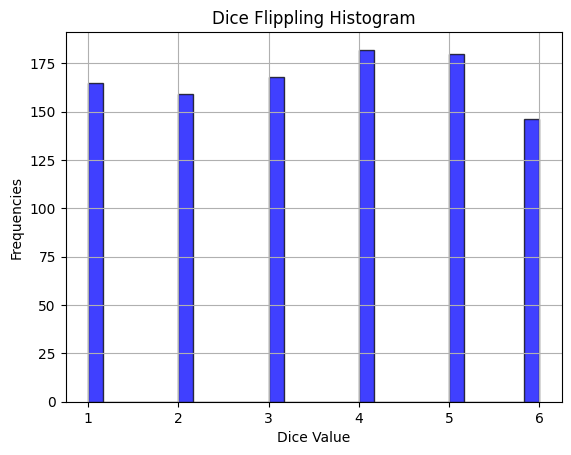

In [ ]:
# So we roll a fair dice
values = [1, 2, 3, 4, 5, 6]
probs = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
# 100 times rolling the dice
s = np.random.choice(values, 1000, p=probs)
plt.title("Dice Flippling Histogram")
plt.xlabel("Dice Value")
plt.ylabel("Frequencies")
plt.hist(s,30,alpha=0.75, color='blue', edgecolor='black')
plt.grid(True)
plt.show()

In [ ]:
# But recall we were talking about the MEAN, so
print(s.mean())

3.491


[3.28, 3.23, 3.33, 3.78, 3.42, 3.43, 3.06, 3.46, 3.66, 3.57]


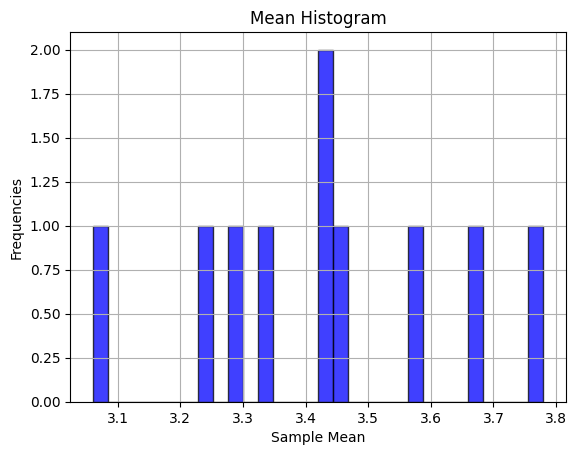

In [ ]:
# Let us look at the means of 10 different samplings of size 100
m = [np.random.choice(values, 100, p=probs).mean() for i in range(10)]
print(m)
plt.title("Mean Histogram")
plt.xlabel("Sample Mean")
plt.ylabel("Frequencies")
plt.hist(m,30,alpha=0.75, color='blue', edgecolor='black')
plt.grid(True)
plt.show()

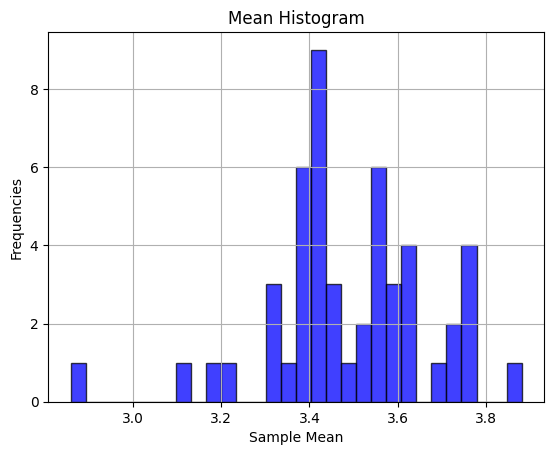

In [ ]:
# Let us look at the means of 50 different samplings of size 100
m = [np.random.choice(values, 100, p=probs).mean() for i in range(50)]
#print(m)
plt.title("Mean Histogram")
plt.xlabel("Sample Mean")
plt.ylabel("Frequencies")
plt.hist(m,30,alpha=0.75, color='blue', edgecolor='black')
plt.grid(True)
plt.show()

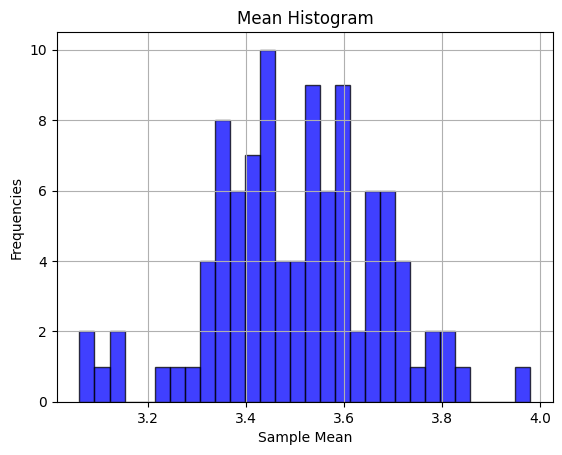

In [ ]:
# Let us look at the means of 50 different samplings of size 100
m = [np.random.choice(values, 100, p=probs).mean() for i in range(100)]
#print(m)
plt.title("Mean Histogram")
plt.xlabel("Sample Mean")
plt.ylabel("Frequencies")
plt.hist(m,30,alpha=0.75, color='blue', edgecolor='black')
plt.grid(True)
plt.show()

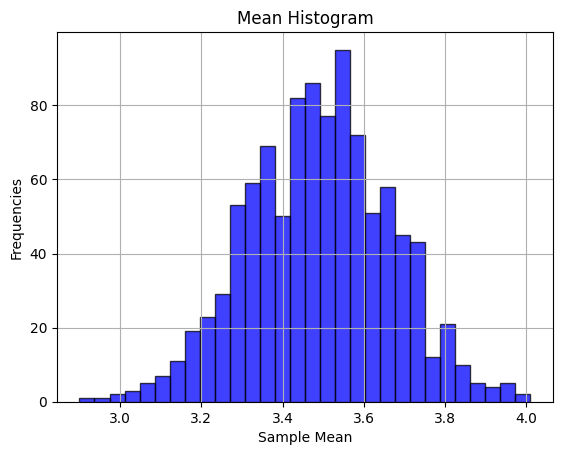

In [ ]:
# Let us look at the means of 50 different samplings of size 100
m = [np.random.choice(values, 100, p=probs).mean() for i in range(1000)]
#print(m)
plt.title("Mean Histogram")
plt.xlabel("Sample Mean")
plt.ylabel("Frequencies")
plt.hist(m,30,alpha=0.75, color='blue', edgecolor='black')
plt.grid(True)
plt.show()

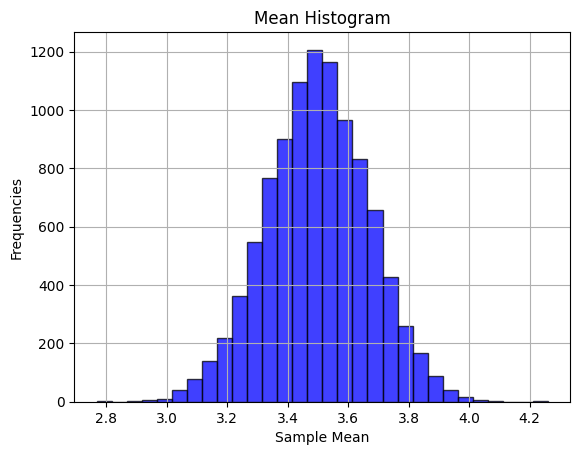

In [ ]:
# Let us look at the means of 50 different samplings of size 100
m = [np.random.choice(values, 100, p=probs).mean() for i in range(10000)]
#print(m)
plt.title("Mean Histogram")
plt.xlabel("Sample Mean")
plt.ylabel("Frequencies")
plt.hist(m,30,alpha=0.75, color='blue', edgecolor='black')
plt.grid(True)
plt.show()

### Comments

- As the sample size increases, the more it resembles a normal distribution. This is the difference between rolling 10 dice 10 times or 10000 times.
- As we increase the number of samples, the more centered at the real mean the sample is, and the less variance it has. This is the difference between rolling 10 dice or 10000 dice each time.

In [ ]:
for j in range(6):
    ns = 10**j
    m = [np.random.choice(values, ns, p=probs).mean() for i in range(1000)]
    print('Number of samples: '+str(ns))
    print('Difference with real mean: '+str(np.mean(m)-3.5))
    print('Variance: '+str(np.var(m)))
    print('-----------------------------')

Number of samples: 1
Difference with real mean: 0.11799999999999988
Variance: 2.9500760000000006
-----------------------------
Number of samples: 10
Difference with real mean: 0.03359999999999985
Variance: 0.29669103999999996
-----------------------------
Number of samples: 100
Difference with real mean: 0.0017900000000001803
Variance: 0.030972695900000003
-----------------------------
Number of samples: 1000
Difference with real mean: 0.0016620000000000523
Variance: 0.0028528857559999995
-----------------------------
Number of samples: 10000
Difference with real mean: -0.0009542000000002382
Variance: 0.0003000401623600002
-----------------------------
Number of samples: 100000
Difference with real mean: -1.3109999999816324e-05
Variance: 2.9037137827900067e-05
-----------------------------
